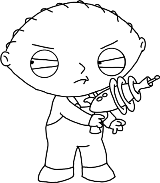

In [18]:
using ImageMagick, Images, ImageTransformations
download("https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Yin_yang.svg/699px-Yin_yang.svg.png", "yy.png")
im = Gray.(imresize(load("stewie.png"), ratio=0.4))
img = Int.(round.(im))
display(imresize(im, ratio=1))

In [19]:
y = vcat(img...)
length(y)

29280

In [20]:
include("../code/headers.jl")
q = 2
n = length(y)
R = reverse(0.2:0.2:0.8)
nrates = length(R)
m = Int.(round.(n*(1 .- R)))
seed = 234
algo = OptimalCycle()
compressed = [zeros(Int,n) for r in R]

nchunks = 4
@assert mod(n, nchunks)==0
@assert all([mod(mm, nchunks)==0 for mm in m])
chunk_length = div(n, nchunks)

7320

In [21]:
for j in 1:nrates
    println("-- Rate $j of $nrates: ")
    for c in 1:nchunks
        println("--- Chunk $c of $nchunks")
        lm = LossyModel(q, chunk_length, div(m[j], nchunks), y=y[(c-1)*chunk_length+1:c*chunk_length])
        breduction!(lm,1)
        res = solve!(lm, algo, randseed=seed, verbose=true, showprogress=true)
        compressed[j][(c-1)*chunk_length+1:c*chunk_length] = lm.x
    end
end

-- Rate 1 of 4: 
--- Chunk 1 of 4
Iter 1. Distortion 0.7627. Cycle weight -2928.0. Energy shift -1464.0
Iter 2. Distortion 0.5627. Cycle weight -2928.0. Energy shift -1464.0
Iter 3. Distortion 0.3627. Cycle weight -2928.0. Energy shift -1464.0
Iter 4. Distortion 0.1634. Cycle weight -2918.0. Energy shift -1459.0
Iter 5. Distortion 0.0277. Cycle weight -1986.0. Energy shift -993.0
Iter 6. Distortion 0.0277. Cycle weight 0.0. Energy shift 0.0
--- Chunk 2 of 4
Iter 1. Distortion 0.7276. Cycle weight -2928.0. Energy shift -1464.0
Iter 2. Distortion 0.5276. Cycle weight -2928.0. Energy shift -1464.0
Iter 3. Distortion 0.3277. Cycle weight -2926.0. Energy shift -1463.0
Iter 4. Distortion 0.1351. Cycle weight -2820.0. Energy shift -1410.0
Iter 5. Distortion 0.0393. Cycle weight -1402.0. Energy shift -701.0
Iter 6. Distortion 0.0392. Cycle weight -2.0. Energy shift -1.0
Iter 7. Distortion 0.0392. Cycle weight 0.0. Energy shift 0.0
--- Chunk 3 of 4
Iter 1. Distortion 0.6746. Cycle weight -2928.

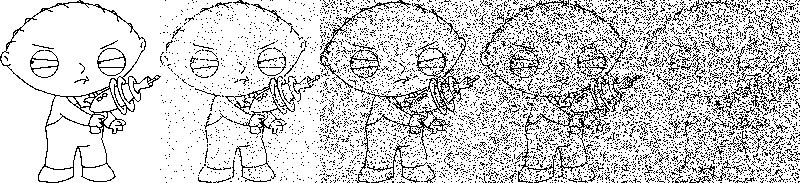

In [22]:
compressed_imgs = [reshape(x, size(im)) for x in compressed]
display(imresize(Gray.(hcat(img, compressed_imgs...)), ratio=1))